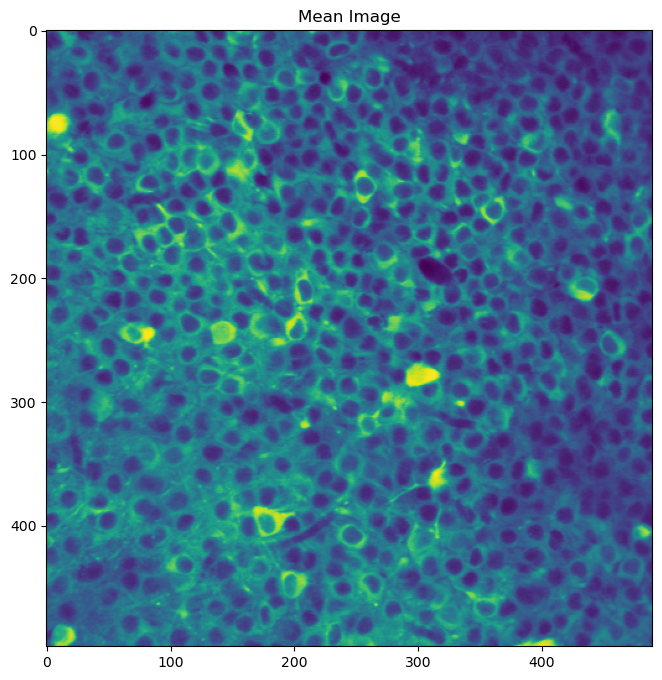

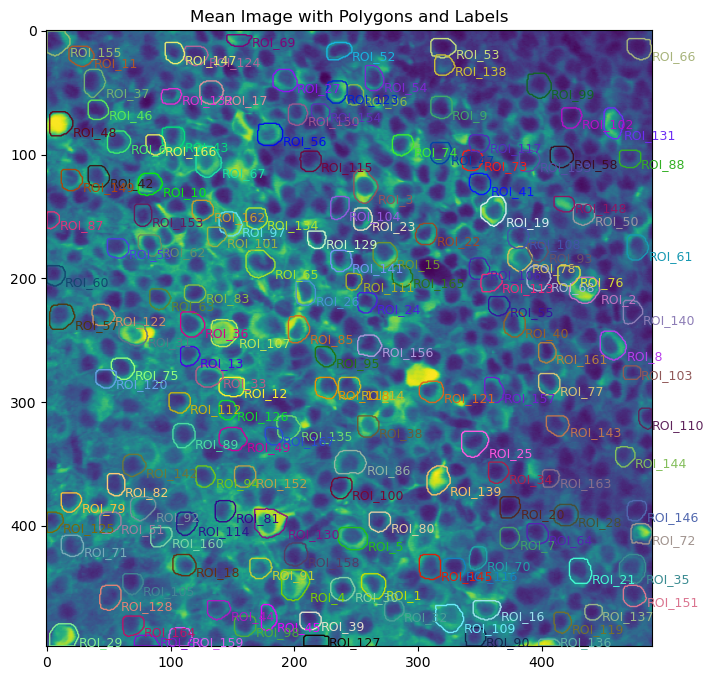

In [13]:
import matplotlib.pyplot as plt
import json
import numpy as np
import matplotlib.patches as patches

# Function to parse JSON and extract polygons with scores above a threshold
def extract_polygons(json_file, confidence_threshold):
    with open(json_file) as file:
        data = json.load(file)
    
    polygons = []
    color_map = {}
    for i, shape in enumerate(data['shapes']):
        if shape['score'] >= confidence_threshold:
            polygon = np.array(shape['points'])
            polygons.append(polygon)
            color_map[f"ROI_{i+1}"] = np.random.rand(3,)  # Assign a random color with ROI label

    return polygons, color_map

# File paths
image_file = '0-436_mean.png'
json_file = '0-436_mean.json'

# Load and display the image
image = plt.imread(image_file)

# Set a larger figure size for better visibility
plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.title('Mean Image')
plt.show()

# Example usage
confidence_threshold = 0  # Set your confidence threshold here
polygons, color_map = extract_polygons(json_file, confidence_threshold)

# Plot the image with polygons and labels
plt.figure(figsize=(10, 8))
plt.imshow(image)
for i, polygon in enumerate(polygons):
    label = f"ROI_{i+1}"
    plt.gca().add_patch(patches.Polygon(polygon, closed=True, edgecolor=color_map[label], fill=False))
    # Positioning the label at the top right of the polygon
    polygon_top_right = np.max(polygon, axis=0)
    plt.text(polygon_top_right[0], polygon_top_right[1], label, color=color_map[label], fontsize=9)
plt.title('Mean Image with Polygons and Labels')
plt.show()


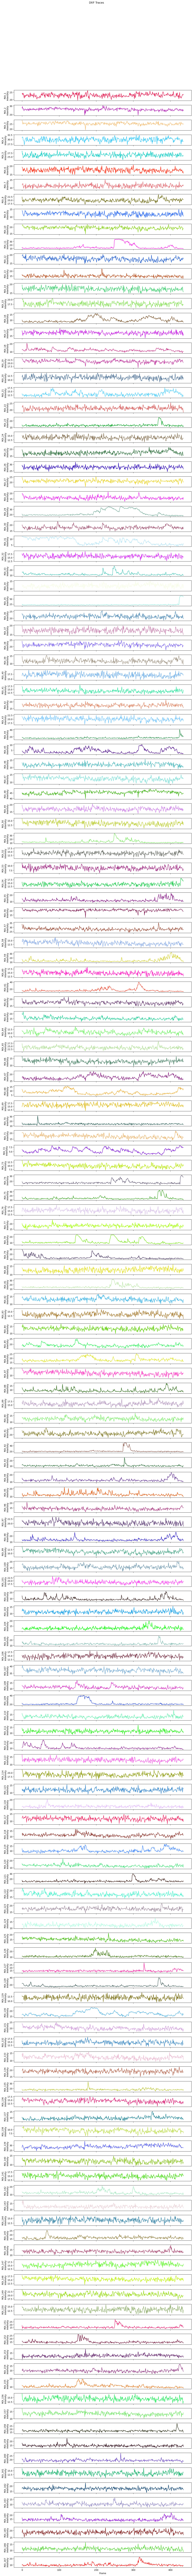

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to plot traces for each ROI
def plot_traces(traces_file, color_map, start_frame=0, end_frame=None, title="Traces Plot"):
    # Load traces data without headers
    traces = pd.read_csv(traces_file, sep='\t', header=None)
    if end_frame is not None:
        traces = traces.iloc[start_frame:end_frame]
    else:
        traces = traces.iloc[start_frame:]

    # Number of ROIs
    num_rois = traces.shape[1]

    # Check if the number of columns in the TSV file matches the number of keys in the color dict
    if num_rois != len(color_map):
        print(f"Warning: The number of ROIs ({num_rois}) does not match the number of colors provided ({len(color_map)})")

    # Extract colors from the color map in the order they appear
    colors = list(color_map.values())[:num_rois]

    # Create subplots
    fig, axs = plt.subplots(num_rois, 1, figsize=(12, num_rois * 1), sharex=True)  # Reduced height for each subplot
    if num_rois == 1:  # If there is only one ROI, axs is not a list
        axs = [axs]

    # Plot each trace
    for i, ax in enumerate(axs):
        ax.plot(traces.index, traces.iloc[:, i], color=colors[i])
        ax.set_ylabel(f'ROI_{i+1}\nIntensity')

    axs[-1].set_xlabel('Frame')
    plt.suptitle(title)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit the title
    plt.subplots_adjust(hspace=0.4)  # Adjust vertical spacing between subplots
    plt.show()

# File paths for traces
raw_traces_file = '0-436_mean_traces.tsv'
df_f_traces_file = '0-436_mean_traces_df_f.tsv'


# Call the function with the color mapping dictionary from the previous step
#plot_traces(raw_traces_file, color_map, start_frame=0, end_frame=436, title="Raw Traces")
plot_traces(df_f_traces_file, color_map, start_frame=0, end_frame=436, title="Df/F Traces")
